In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
# Setting the default seaborn theme
sns.set_theme(style='darkgrid')

# Visualizing Compositions or, Proportions that are independent of time

Displaying individual **parts of a whole** enables **comparisons among subcategories** by evaluating relative proportions, for example, market share by companies for a particular product or service. 

**Note:** The data can be time dependent or independent. But, here we will discuss only about the charts used for visualizing time independent data.

- **Questions:**
1. What are the parts that make up the whole?
2. What part is the largest or smallest?
3. What parts are similar or dissimilar?

- **Insight:** use to show summaries, similarities, anomalies, percentage related to the whole (by category, subcategory, and over time).

- **Data:** single categorical variable with subcategories, two or more variables.

- **Chart options:** pie, stacked bar, stacked 100% bar, tree map, and doughnut chart.

## **Pie Charts**

Pie charts show proportions within a whole. **The slices are subcategories of a single category**. Slices add up to 100% or 1.

##### --> 
When to use Pie Charts

- **Usually, a Pie chart is never the answer.**
- A pie chart typically represents numbers in percentages, used to visualize a part to whole relationship or a composition. Pie charts are **not meant to compare individual sections to each other or to represent exact values** (you should use a bar chart for that).

##### --> 
When to avoid Pie Charts

- Avoid using pie charts if all the slices are similar in size.
- When possible, avoid pie charts and donuts. The human mind thinks linearly but, when it comes to angles and areas, most of us can’t judge them well.

##### --> 
Best practices for Pie charts

- Limit pie charts to six slices or less.
- Label directly on the pie slices, rather than using a legend.
- Make sure that the total sum of all segments equals 100 percent.
- Don’t use 3D or blow apart effects — they reduce comprehension and show incorrect proportions.

##### --> 

Seaborn doesn't have any default function to draw pie charts. But we can use `matplotlib.pyplot.pie(x, labels, colors, autopct, pctdistance=0.6, labeldistance=1.1)` to draw pie charts. Seaborn color palettes can be passed to the colors argument.

- The detailed documentation of the functionality can be found at, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html.

- <b> <u> Important Parameters: </u> </b>

    - `x (1D array-like):` The wedge sizes.
    - `labels (list):` A sequence of strings providing the labels for each wedge
    - `colors:` A sequence of colors through which the pie chart will cycle. Accepts Seaborn color palettes.
    - `autopct:` If not None, autopct is a string or function used to label the wedges with their numeric value.
    - `pctdistance:` The relative distance along the radius at which the the text generated by autopct is drawn. To draw the text outside the pie, set pctdistance > 1.
    - `labeldistance:` The relative distance along the radius at which the labels are drawn. To draw the labels inside the pie, set labeldistance < 1.

In [3]:
# loading example dataset
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# to see what percentage of the total tips were given by smokers and how much by non-smokers,
x = (df_tips.groupby('smoker').tip.agg('sum')/df_tips.tip.agg('sum'))*100
color_palette = sns.color_palette("pastel")

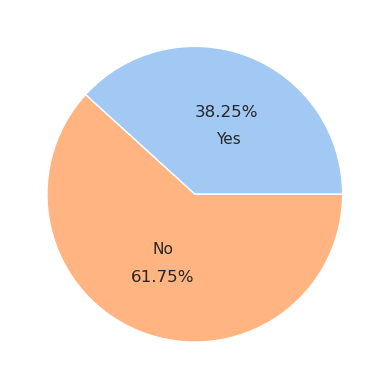

In [5]:
plt.pie(x, labels=x.index, colors=color_palette, autopct="%.2f%%", labeldistance=0.4)
plt.show()

## **Stacked and 100% Stacked Bar Charts**

Stacked bar charts can be used to show both proportions and quantities **within** a whole category. The usual stacked bar chart shows absolute differences and the 100% stacked bar chart is used to show relative differences.

##### --> 
When to use and When to avoid Stacked and 100% Stacked Bar Charts
- Application of stacked bar charts are suitable only when there are only a few variables, composition parts, and **the emphasis is on composition, not comparison**. Stacked bars are **not good for comparison** or relationship analysis. The reason is due to the fact that, the only common baseline is the bottom line (for vertical bars) or, along the left axis (for horizontal bars) of the chart, so you can only reliably compare values in the first series and for the sum of all series.

- Use stacked bars that add up to 100% to show the **relative differences** between quantities **within each group**. Again, the emphasis is on composition, and not comparison.

##### --> 
Best practices for Stacked Bar charts

- Limit the number of subcategories to four or less.

##### --> 
`To draw` stacked bar charts in seaborn, we can use the `seaborn.barplot(data, x, y)` function. The detailed documentation of the functionality can be found at, https://seaborn.pydata.org/generated/seaborn.barplot.html.

- <b> <u> Important Parameters: </u> </b>

    - `data:` DataFrame. Long-form (tidy) dataset for plotting.
    - `x, y, hue:` names of variables in data.
    - `estimator:` Statistical function to estimate within each categorical bin.
    - `orient (“v” | “h”):` Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both x and y are numeric or when plotting wide-form data.
    - `color:` Colors to use for plotting the elements. See, https://matplotlib.org/stable/gallery/color/named_colors.html. 
    - `bottom:` the height at which to start plotting the bar graph


##### -->
**`Note:`**
- Plotting stacked bar charts in Seaborn or Matplotlib is complex. Use Pandas to plot stacked bar charts instead (see, *ML_Intro/Pandas/05_Plotting.ipynb*).
- Use `color` in `sns.barplot()` instead of, `palette` (makes it possible to add legends using matplotlib patches).

**Example of Stacked Bar Plot Using Seaborn**

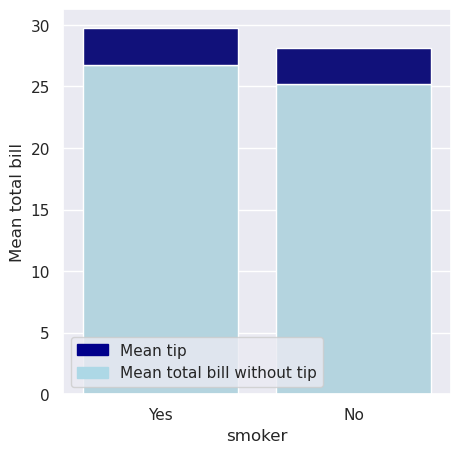

In [10]:
# initializing the axes to plot on
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

df_tips = df_tips.assign(total_bill_without_tip = df_tips.total_bill, total_bill = lambda df_ : df_.total_bill_without_tip + df_.tip)

total_bill_without_tip_bar = sns.barplot(df_tips, x='smoker', y='total_bill_without_tip', errorbar=None, color='lightblue')
height_to_start_plotting_tip = df_tips.groupby('smoker').total_bill_without_tip.agg('mean')
tip_bar = sns.barplot(df_tips, x='smoker', y='tip', errorbar=None, color='darkblue', bottom=height_to_start_plotting_tip)

# correcting ylabel
plt.ylabel('Mean total bill')

# adding legend
tip_legend = mpatches.Patch(color='darkblue', label='Mean tip')
total_bill_without_tip_legend = mpatches.Patch(color='lightblue', label='Mean total bill without tip')
plt.legend(handles=[tip_legend, total_bill_without_tip_legend])

plt.show()